# Appliquer votre méthodologie sur le jeu de données de détection d’intrusions dans les réseaux (Kddcup99). 

<hr>

In [1]:
from utils import *
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

### Import du dataset

<hr>

In [2]:
df = pd.read_csv('../data/KDDCup99.csv', sep=',')
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


<hr>

In [3]:
# Récupération de la classe 0 qui sera normal pour aucune attaque
df['label'] = np.where(df['label'] == 'normal', 0, 1)

In [4]:
# récupération de X et de nos target
X = df.drop(columns=['label'])
Y = df['label']

In [5]:
# Taille échantillon à 0.3
taille_echantillon = int(np.sum(Y == 0) * 0.03)

In [6]:
# Extraction des anomalies
X_anomalie = X[Y == 1]
Y_anomalie = Y[Y == 1]

In [7]:
# Echantillonnage aléatoire des anomalies
idx = np.random.randint(len(X_anomalie), size=taille_echantillon)
X_anomalie_sampled = X_anomalie.iloc[idx]
Y_anomalie_sampled = Y_anomalie.iloc[idx]

In [8]:
# Extraction des données normales
X_normal = X[Y == 0]
Y_normal = Y[Y == 0]

In [9]:
# Concatenation des données normales et des anomalies échantillonnées
X_final = pd.concat([X_normal, X_anomalie_sampled], axis=0)
Y_final = pd.concat([Y_normal, Y_anomalie_sampled], axis=0)

In [10]:
# nombre de sample et de % d'anomalie
n_samples = X_final.shape[0]
anomaly_frac = Y_final.mean()

In [11]:
# nombre de points de données et d'anomalies
print(f"{n_samples} datapoints with {Y_final.sum()} anomalies ({anomaly_frac:.2%})")

100195 datapoints with 2918 anomalies (2.91%)


In [12]:
# Get dummies sur nos colonnes catégorielles 
X_final_encoded = pd.get_dummies(X_final, columns=['protocol_type', 'service', 'flag'])

In [13]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_final_encoded, Y_final, test_size=0.1, stratify=Y_final, random_state=42)

In [14]:
# RobustScaler fonction
Xtrain_scaled = RobScaler(X_train)
Xtest_scaled = RobScaler(X_test)

Model : Logistic Regression : Average Precision = 0.9916836404916088, Threshold = 0.3875954164590061


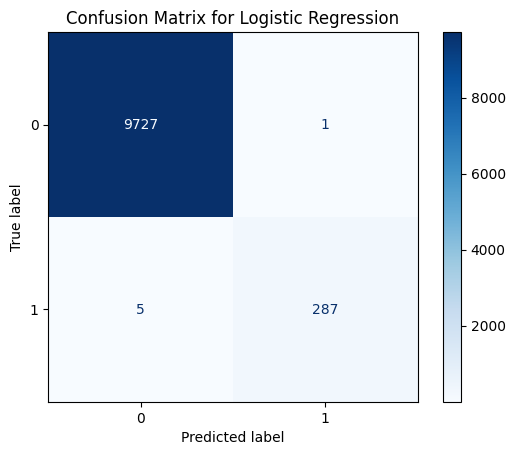

Model : RandomForestClassifier : Average Precision = 1.0, Threshold = 0.3


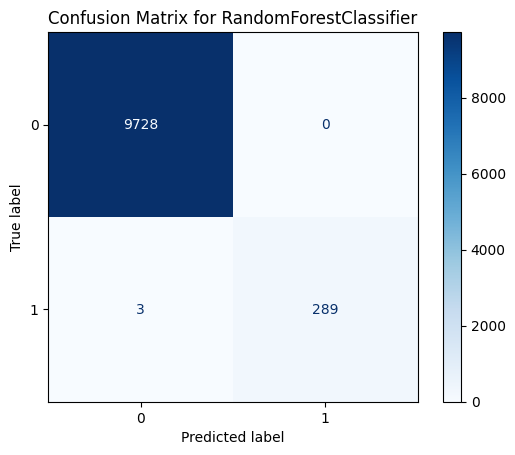

Model : Logistic Regression SMOTE : Average Precision = 0.9916836404916088, Threshold = 0.3875954164590061


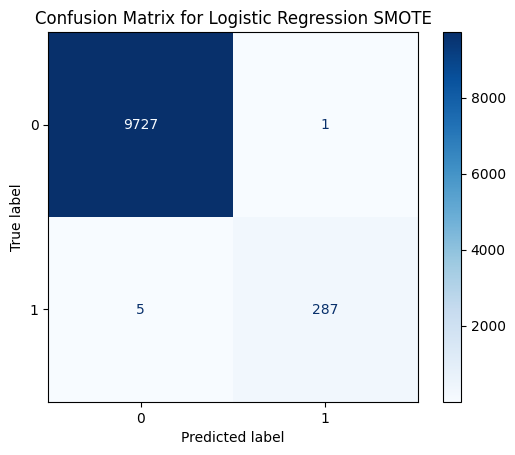

Model : RandomForestClassifier SMOTE : Average Precision = 1.0, Threshold = 0.3


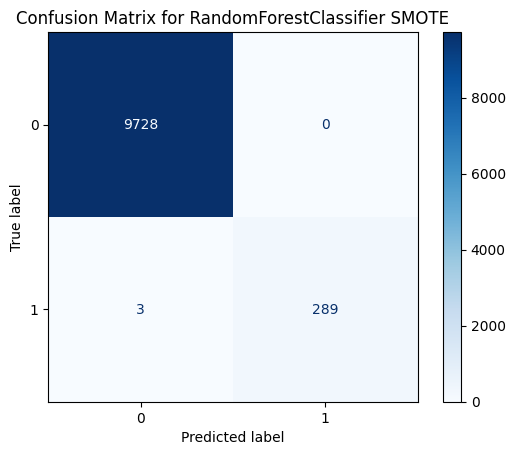

Model : Logistic Regression Tomek : Average Precision = 0.9901359589000536, Threshold = 0.4005120911483282


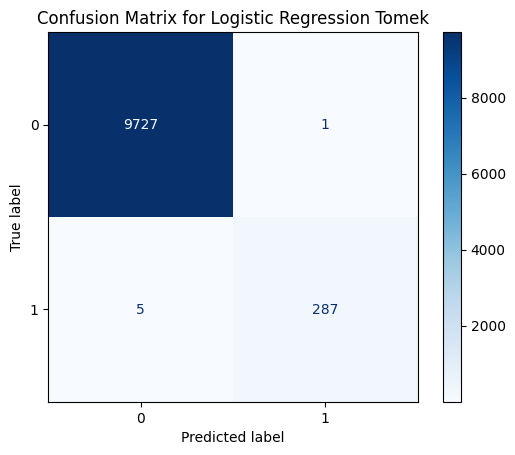

Model : RandomForestClassifier Tomek : Average Precision = 0.9996347031963471, Threshold = 0.4


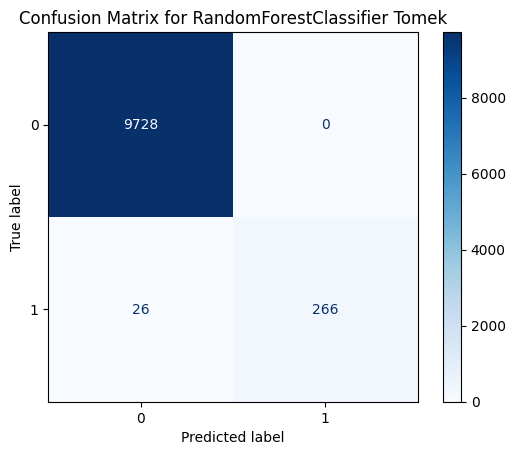

Model : Logistic Regression Balanced : Average Precision = 0.9962633008577724, Threshold = 0.9924533147103115


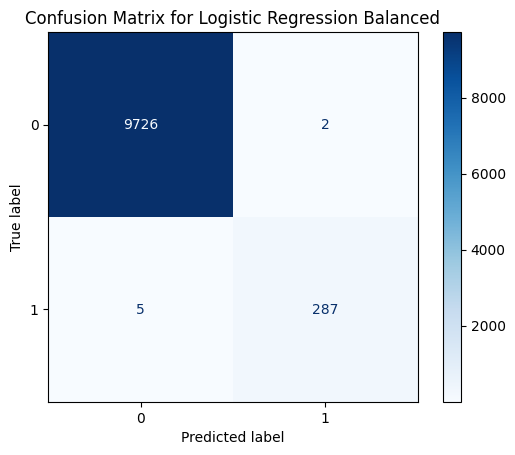

Model : RandomForestClassifier Balanced : Average Precision = 0.9999649747307442, Threshold = 0.2


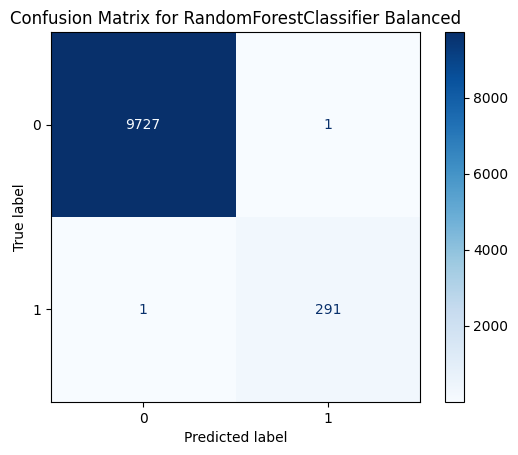

Model : Isolation Forest : Average Precision = 0.018195192546263977, Threshold = 0.05476251123868753


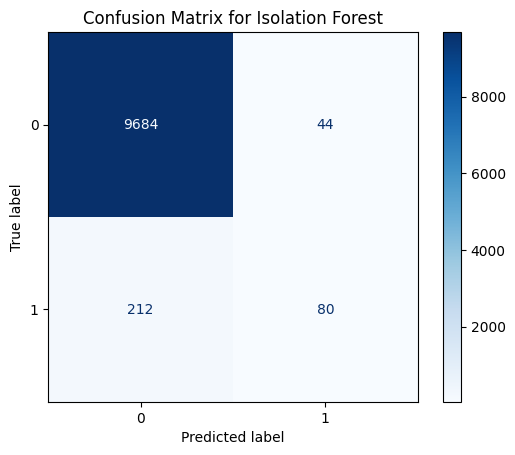

Model : Local Outlier Factor : Average Precision = 0.02924794295083713, Threshold = 0.5512496941055787


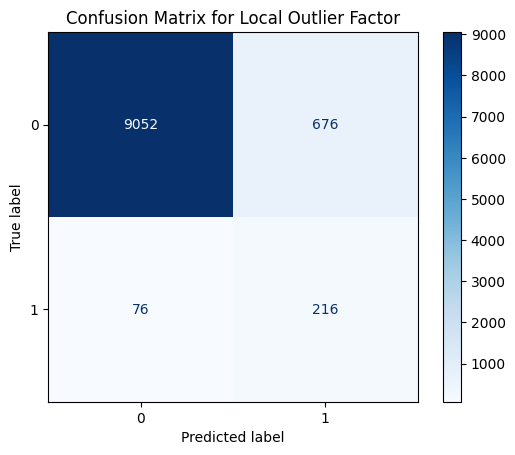


Meilleur modèle: RandomForestClassifier avec un score de 1.0


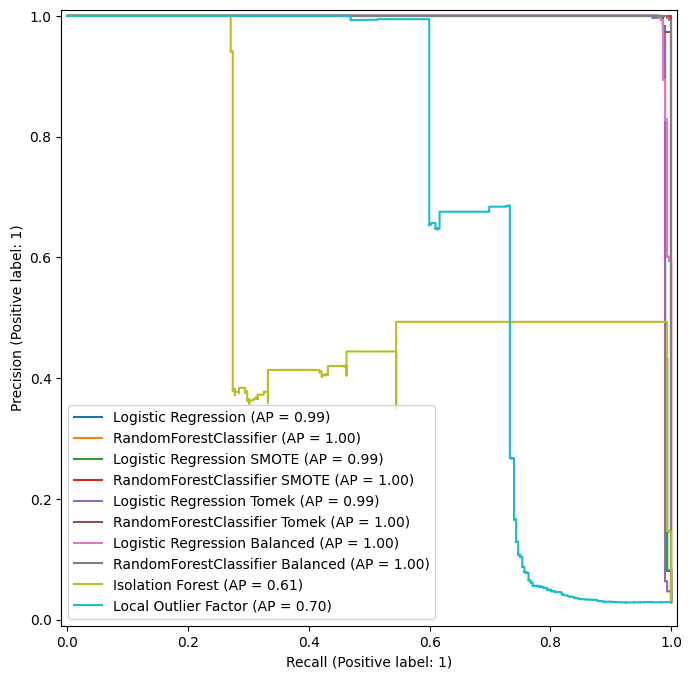

In [15]:
# Appel de notre pipeline
pipeline(Xtrain_scaled, Xtest_scaled, Y_train, Y_test)

<hr>

## Analyse des résultats.

#### Pour les données du fichier `KDDCup99.csv, le fait d'avoir des résultats aussi haut me fais penser qu'il y'a soit un problème de déséquilibre soit un problème de fuite d'information.